In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
from statsmodels.tsa.stattools import adfuller


In [2]:
!pip install pmdarima

In [3]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [4]:
import pandas as pd
df = pd.read_csv("AirPassengers.csv")

In [5]:
df.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [6]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


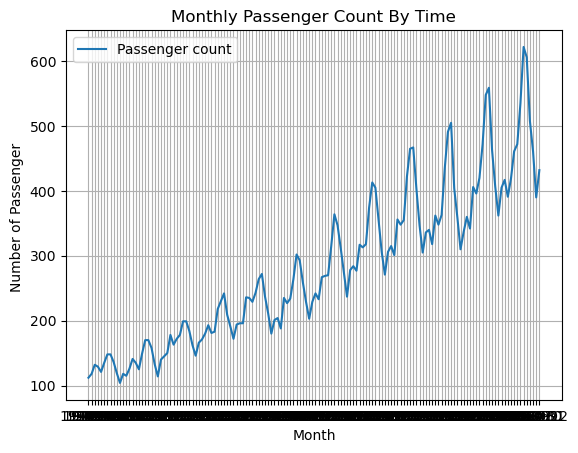

In [7]:
plt.plot(df["Month"], df["#Passengers"],label ="Passenger count")
plt.title("Monthly Passenger Count By Time")
plt.xlabel("Month")
plt.ylabel("Number of Passenger ")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [9]:
df["Month"]= pd.to_datetime(df["Month"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


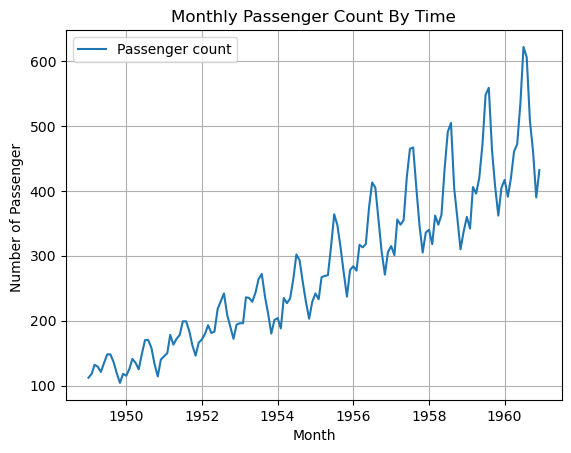

In [11]:
plt.plot(df["Month"], df["#Passengers"],label ="Passenger count")
plt.title("Monthly Passenger Count By Time")
plt.xlabel("Month")
plt.ylabel("Number of Passenger ")
plt.legend()
plt.grid(True)
plt.show()

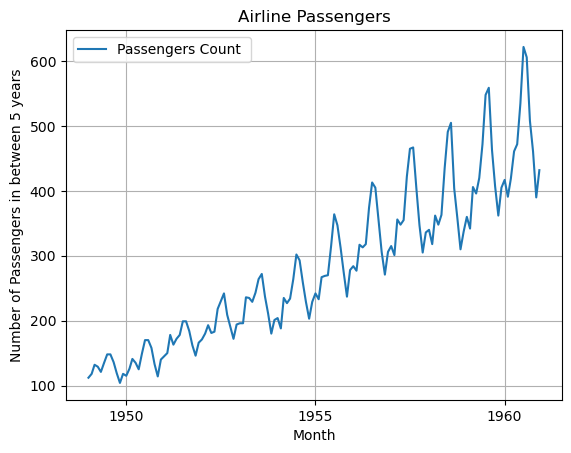

In [12]:
plt.plot(df["Month"],df["#Passengers"], label ="Passengers Count ")
plt.xlabel("Month")
plt.ylabel("Number of Passengers in between 5 years")
plt.title("Airline Passengers")
plt.legend()
plt.gca().xaxis.set_major_locator(YearLocator(5))
plt.grid(True)
plt.show()

In [13]:
time_data = df["#Passengers"]

In [14]:
result = adfuller(time_data)

In [15]:
print("ADF Statistic", result[0])
print("p-value", result[1])
print("Critical Values:", result[4])

ADF Statistic 0.8153688792060371
p-value 0.9918802434376408
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [16]:
if result[1] <= 0.05:
    print("Time series is stationary")
else:
    print("Time series is not stationary")

Time series is not stationary


In [17]:
time_data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [38]:
time_data.head(5)

0    112
1    118
2    132
3    129
4    121
Name: #Passengers, dtype: int64

In [18]:
model = auto_arima(time_data, suppress_warnings=True, seasonal=False, stepwise=True)


In [19]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (4, 1, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [20]:
order = model.get_params()['order']

In [21]:
arima_model = ARIMA(time_data, order=order)

In [22]:
arima_result = arima_model.fit()

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [23]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -674.913
Date:                Wed, 08 Jan 2025   AIC                           1365.825
Time:                        09:16:05   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1718     85.615      8.458      0.000     556.369     891.975
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

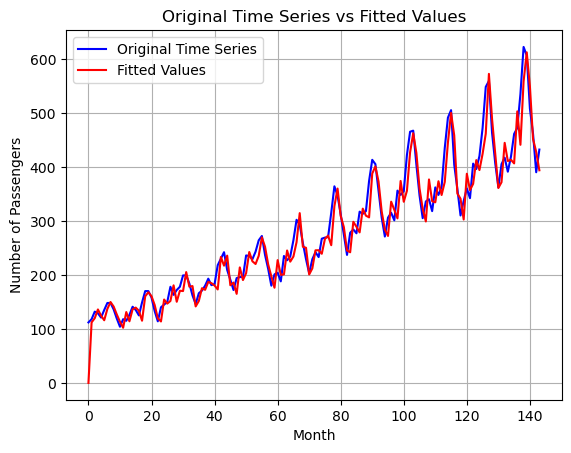

In [43]:
plt.plot(time_data, label="Original Time Series", color="blue")


plt.plot(arima_result.fittedvalues, label="Fitted Values", color="red")


plt.title("Original Time Series vs Fitted Values")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [26]:
forecast_values = arima_result.get_forecast(steps=forecast_steps).predicted_mean


In [47]:
forecast_steps = 24
forecast_index = pd.date_range(
    start=df.index[-1] + pd.DateOffset(months=1),
    periods=forecast_steps,
    freq="M"
)

forecast_index


/var/folders/zc/2tfcymgx7tdbmn9w3ld9_hgh0000gn/T/ipykernel_2147/3422133622.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(


DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31', '1961-11-30', '1961-12-31',
               '1962-01-31', '1962-02-28', '1962-03-31', '1962-04-30',
               '1962-05-31', '1962-06-30', '1962-07-31', '1962-08-31',
               '1962-09-30', '1962-10-31', '1962-11-30', '1962-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [45]:
forecast_values

144    467.573901
145    490.494756
146    509.137139
147    492.554920
148    495.306027
149    475.947798
150    476.339813
151    475.552124
152    472.353862
153    483.889740
154    475.570287
155    485.921633
156    479.133706
157    480.987508
158    482.221455
159    476.211090
160    483.942874
161    475.847424
162    482.794334
163    479.012032
164    479.518718
165    482.449521
166    476.974025
167    483.511092
Name: predicted_mean, dtype: float64

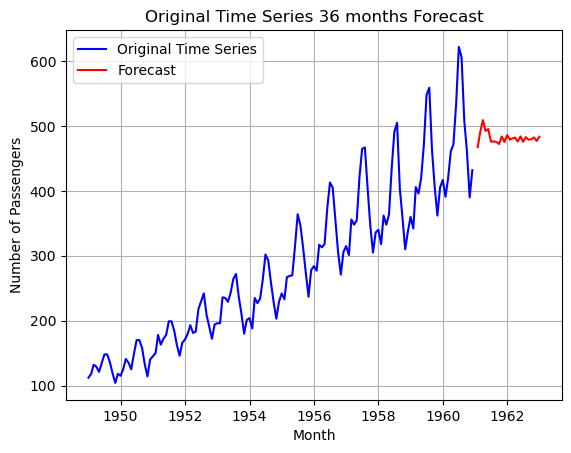

In [46]:
plt.plot(df.index, df, label="Original Time Series", color="blue")
plt.plot(forecast_index, forecast_values, label="Forecast", color="red")
plt.title("Original Time Series 36 months Forecast")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()